Importando libs e base.

In [ ]:
# Instalar bibliotecas necessárias
!pip install ucimlrepo scikit-learn

# Importar bibliotecas
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# fetch dataset
communities_and_crime = fetch_ucirepo(id=183)

# data (as pandas dataframes)
X = communities_and_crime.data.features
y = communities_and_crime.data.targets

# metadata
print(communities_and_crime.metadata)

# variable information
print(communities_and_crime.variables)


{'uci_id': 183, 'name': 'Communities and Crime', 'repository_url': 'https://archive.ics.uci.edu/dataset/183/communities+and+crime', 'data_url': 'https://archive.ics.uci.edu/static/public/183/data.csv', 'abstract': 'Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1994, 'num_features': 127, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Occupation'], 'target_col': ['ViolentCrimesPerPop'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2002, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C53W3X', 'creators': ['Michael Redmond'], 'intro_paper': {'ID': 405, 'type': 'NATIVE', 'title': 'A data-driven software tool for enabling cooperative information s

Modelo Linear - Todas as Variáveis
RMSE Treino: 0.13
MAE Treino: 0.09
RMSE Teste: 0.13
MAE Teste: 0.10

Modelo Linear - 5 Componentes PCA
RMSE Treino PCA: 0.16
MAE Treino PCA: 0.11
RMSE Teste PCA: 0.15
MAE Teste PCA: 0.11


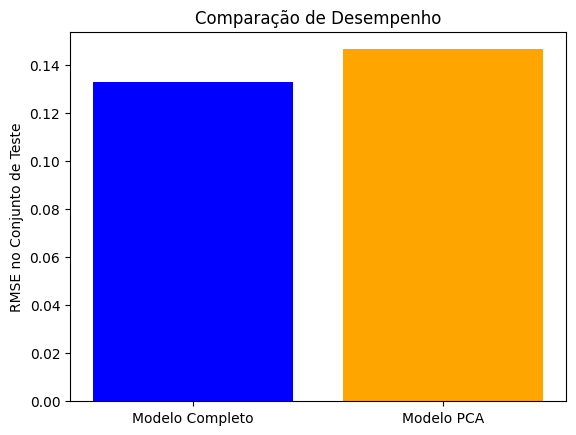

In [ ]:
# Selecionar apenas colunas numéricas para X
X = X.select_dtypes(include=[np.number])

# Preencher valores faltantes com a média
X.fillna(X.mean(), inplace=True)

# Dividir a base de dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Etapa 1: Regressão Linear com todas as variáveis
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predição e cálculo de métricas para o conjunto de treino e teste
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

# Métricas para o modelo inicial
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Modelo Linear - Todas as Variáveis")
print(f"RMSE Treino: {rmse_train:.2f}")
print(f"MAE Treino: {mae_train:.2f}")
print(f"RMSE Teste: {rmse_test:.2f}")
print(f"MAE Teste: {mae_test:.2f}")

# Etapa 2: Aplicação de PCA para redução de dimensionalidade para 5 componentes
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Treinamento do modelo de regressão com os dados reduzidos pelo PCA
linear_model_pca = LinearRegression()
linear_model_pca.fit(X_train_pca, y_train)

# Predição e cálculo de métricas para o modelo com PCA
y_train_pca_pred = linear_model_pca.predict(X_train_pca)
y_test_pca_pred = linear_model_pca.predict(X_test_pca)

# Métricas para o modelo com PCA
rmse_train_pca = np.sqrt(mean_squared_error(y_train, y_train_pca_pred))
mae_train_pca = mean_absolute_error(y_train, y_train_pca_pred)
rmse_test_pca = np.sqrt(mean_squared_error(y_test, y_test_pca_pred))
mae_test_pca = mean_absolute_error(y_test, y_test_pca_pred)

print("\nModelo Linear - 5 Componentes PCA")
print(f"RMSE Treino PCA: {rmse_train_pca:.2f}")
print(f"MAE Treino PCA: {mae_train_pca:.2f}")
print(f"RMSE Teste PCA: {rmse_test_pca:.2f}")
print(f"MAE Teste PCA: {mae_test_pca:.2f}")

# Comparação gráfica opcional
plt.bar(['Modelo Completo', 'Modelo PCA'], [rmse_test, rmse_test_pca], color=['blue', 'orange'])
plt.ylabel("RMSE no Conjunto de Teste")
plt.title("Comparação de Desempenho")
plt.show()

O modelo com todas as variáveis obteve o melhor desempenho geral, com erros menores em ambos os conjuntos de treino e teste.
O modelo com PCA, embora um pouco menos preciso, simplificou significativamente a complexidade do modelo, reduzindo a dimensionalidade dos dados. Essa redução de complexidade pode ser vantajosa em aplicações onde o tempo de processamento ou o custo computacional são fatores críticos, ou onde há risco de colinearidade.
**Em resumo, se a precisão for mais importante, é preferível manter todas as variáveis. Caso contrário, o modelo com PCA oferece um compromisso razoável entre precisão e simplicidade.**



1.   Tratamento de Colunas Não Numéricas
    X = X.select_dtypes(include=[np.number]) garante que apenas as colunas numéricas sejam mantidas.
2.   Imputação de Valores Faltantes
    X.fillna(X.mean(), inplace=True) preenche os valores faltantes com a média de cada coluna.
3.  PCA e Comparação Gráfica
O PCA reduz a dimensionalidade para 5 componentes principais, e um gráfico compara o RMSE dos modelos com todas as variáveis e com o PCA.






REFERENCIAS: https://github.com/arnaldog12/Machine_Learning/blob/master/PCA.ipynb